### Importing libraries

In [136]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

### Loading csv dataset

In [119]:
df = pd.read_csv('heart_data.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Inside this dataset output value 1 means high chance and 0 means low chance of heart attack.

### Preparing features

In [120]:
features_df = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
target_df = df[['output']]
features_df = np.asarray(features_df)
target_df = np.asarray(target_df['output'])

### Splitting train and test

In [121]:
x_train, x_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.3)

### Training model

I'm going to use SVM for this project because my dataset is small (<1000) and a bit complex.

In [122]:
clf = svm.SVC(C=1, kernel='linear')
clf.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [126]:
y_pred = clf.predict(x_test)

### Model evaluation

#### Accuracy

In [135]:
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Model accuracy: {round(acc, 4)*100}%")

Model accuracy: 85.71%


#### Confusion Matrix

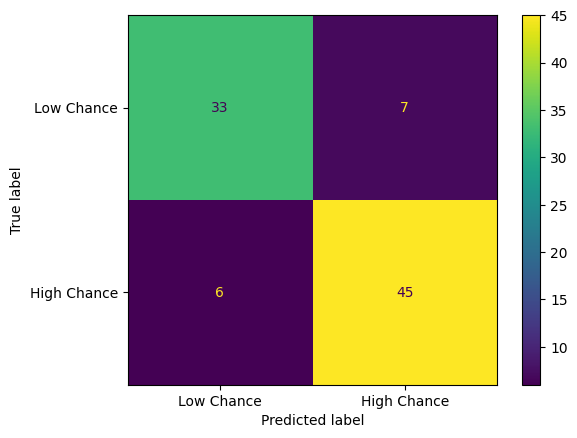

In [142]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Low Chance', 'High Chance'])
cm_display.plot()
plt.show()

In [153]:
print(classification_report(y_test, y_pred, labels=[0, 1], target_names=['Low Chance', 'High Chance']))

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
              precision    recall  f1-score   support

  Low Chance       0.85      0.82      0.84        40
 High Chance       0.87      0.88      0.87        51

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91

